In [1]:
from datetime import timedelta
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
users_df = pd.read_csv('takehome_users.csv', encoding = 'latin1')
engagement_df = pd.read_csv('takehome_user_engagement.csv')

In [3]:
users_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [4]:
engagement_df.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [5]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [6]:
users_df.dtypes

object_id                       int64
creation_time                  object
name                           object
email                          object
creation_source                object
last_session_creation_time    float64
opted_in_to_mailing_list        int64
enabled_for_marketing_drip      int64
org_id                          int64
invited_by_user_id            float64
dtype: object

In [7]:
engagement_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null object
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [8]:
engagement_df.dtypes

time_stamp    object
user_id        int64
visited        int64
dtype: object

There are some missing values in **users_df**:
- last_session_creation_time
- invited_by_user_id

Some data types can be changed:
- creation_time (**users_df**)
- time_stamp (**engagement_df**)

### Create target variable

In [9]:
def active_user(uid, window):
    """
    Determine status of user
    Active if user has logged in on 3 separate days in a given time period
    
        uid:      user ID
        window:   time frame of interest
    """
    
    user_logins = engagement_df[engagement_df['user_id'] == uid]
    user_logins = user_logins.reset_index()
    num_logins = len(user_logins)
    go = True
    i = 0
    
    while go:
        if i + 2 <= num_logins - 1:
            first = user_logins['time_stamp'].dt.date[i]
            third = user_logins['time_stamp'].dt.date[i + 2]
            
            if third - first <= timedelta(days = window):
                go = False
                return 1
            else:
                i += 1
        else:
            break

In [10]:
engagement_df['time_stamp'] = pd.to_datetime(engagement_df['time_stamp'])
users_df['creation_time'] = pd.to_datetime(users_df['creation_time'])
users_df['invited_by_user_id'] = users_df['invited_by_user_id'].fillna(0)
users_df['last_session_creation_time'] = users_df['last_session_creation_time'].fillna(0)

In [11]:
users_df['adopted'] = users_df['object_id'].apply(lambda x: 1 if active_user(x, 7) else 0)

In [12]:
users_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0


## Exploratory Data Analysis

In [13]:
sns.set()

PROPORTION OF ADOPTED USERS BY CREATION SOURCE
----------------------------------------------
GUEST_INVITE: 0.17
ORG_INVITE: 0.13
PERSONAL_PROJECTS: 0.08
SIGNUP: 0.14
SIGNUP_GOOGLE_AUTH: 0.17


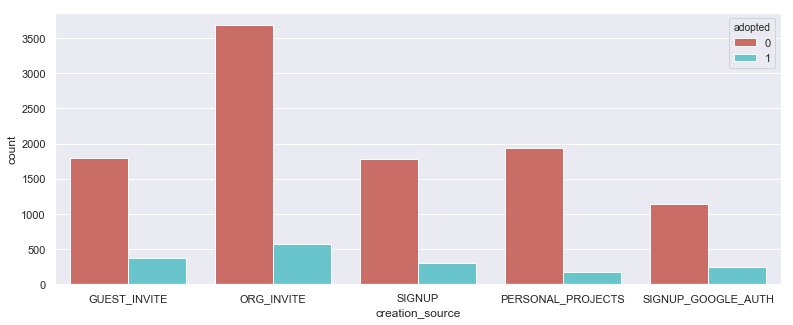

In [14]:
fig, ax = plt.subplots(figsize = (13, 5))

sns.countplot(x = 'creation_source', hue = 'adopted', data = users_df, ax = ax, palette = 'hls')

guest = users_df[users_df['creation_source'] == 'GUEST_INVITE']
org = users_df[users_df['creation_source'] == 'ORG_INVITE']
personal = users_df[users_df['creation_source'] == 'PERSONAL_PROJECTS']
signup = users_df[users_df['creation_source'] == 'SIGNUP']
google = users_df[users_df['creation_source'] == 'SIGNUP_GOOGLE_AUTH']

print('PROPORTION OF ADOPTED USERS BY CREATION SOURCE')
print('----------------------------------------------')
print('GUEST_INVITE:', round(len(guest[guest['adopted'] == 1]) / len(guest), 2))
print('ORG_INVITE:', round(len(org[org['adopted'] == 1]) / len(org), 2))
print('PERSONAL_PROJECTS:', round(len(personal[personal['adopted'] == 1]) / len(personal), 2))
print('SIGNUP:', round(len(signup[signup['adopted'] == 1]) / len(signup), 2))
print('SIGNUP_GOOGLE_AUTH:', round(len(google[google['adopted'] == 1]) / len(google), 2))

It's not intuitive whether or not creation source has any correlation with whether a user is "adopted" or not. A lot of users are from "ORG_INVITE", but the proportion of adopted users is highest in "GUEST_INVITE" and "SIGNUP_GOOGLE_AUTH".

PROPORTION OF ADOPTED USERS BY MARKETING EMAILS
-----------------------------------------------
OPTED: 0.1432865731462926
NOT OPTED: 0.1362425049966689


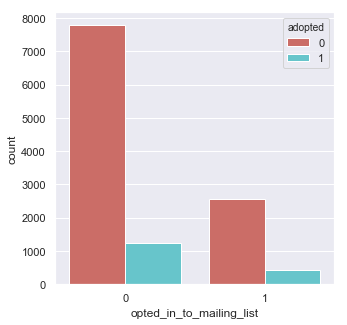

In [15]:
fig, ax = plt.subplots(figsize = (5, 5))

sns.countplot(x = 'opted_in_to_mailing_list', hue = 'adopted', data = users_df, ax = ax, palette = 'hls')

yes = users_df[users_df['opted_in_to_mailing_list'] == 1]
no = users_df[users_df['opted_in_to_mailing_list'] == 0]

print('PROPORTION OF ADOPTED USERS BY MARKETING EMAILS')
print('-----------------------------------------------')
print('OPTED:', len(yes[yes['adopted'] == 1]) / len(yes))
print('NOT OPTED:', len(no[no['adopted'] == 1]) / len(no))

Nothing interesting observed here. The proportion of users who are "adopted" vs not are about the same.

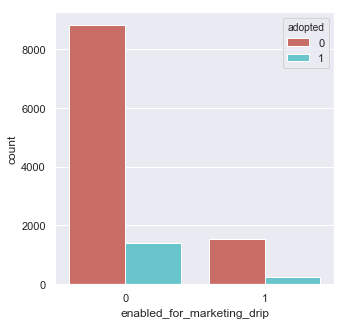

In [16]:
fig, ax = plt.subplots(figsize = (5, 5))

sns.countplot(x = 'enabled_for_marketing_drip', hue = 'adopted', data = users_df, ax = ax, palette = 'hls')

Upon severe scrutinization, it seems that there is a higher proportion of "adopted" users who are NOT on the regular marketing email drip.

### Add 'year' and 'month' column (based on 'creation_time')

In [17]:
users_df['year'] = users_df['creation_time'].dt.year
users_df['month'] = users_df['creation_time'].dt.month
users_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,year,month
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0,2014,4
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1,2013,11
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0,2013,3
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0,2013,5
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0,2013,1


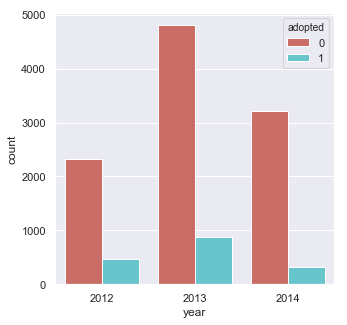

In [18]:
fig, ax = plt.subplots(figsize = (5, 5))

sns.countplot(x = 'year', hue = 'adopted', data = users_df, ax = ax, palette = 'hls')

A lot more users signed up during 2013, but it seems that the proportion of "adopted" users are highest in 2012.

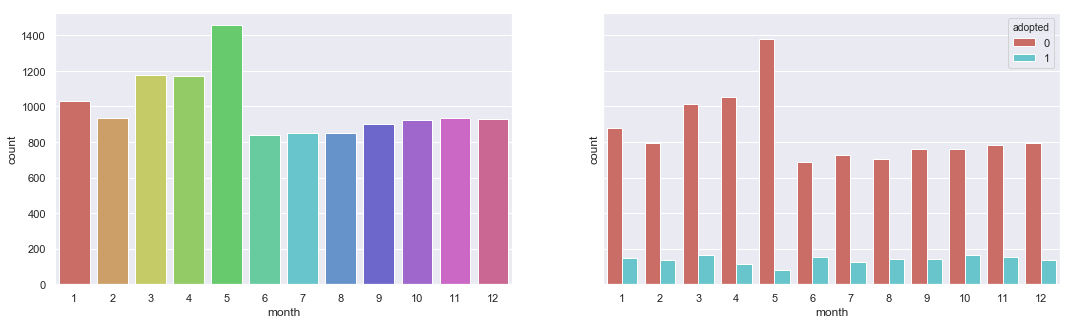

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey = True, figsize = (18, 5))

sns.countplot(x = 'month', data = users_df, ax = ax1, palette = 'hls')
sns.countplot(x = 'month', hue = 'adopted', data = users_df, ax = ax2, palette = 'hls')
#users_df['month'].plot(kind = 'bar', stacked = True)

June has the lowest signups, and sees a gradual increase into the new year. Signups start picking up in March and see a sudden increase in May. Month could be an important feature.

## Machine Learning

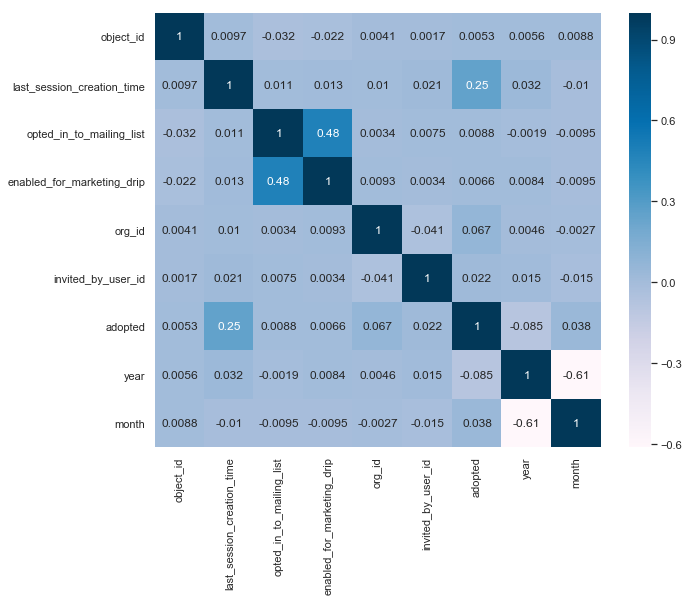

In [20]:
X = users_df.drop(['object_id', 'adopted', 'creation_time', 'name', 'email'], axis = 1)
X = pd.get_dummies(X, columns = ['creation_source'])
y = users_df['adopted']

corrmat = users_df.corr()
top_corr_features = corrmat.index

plt.figure(figsize = (10, 8))
sns.heatmap(users_df[top_corr_features].corr(), annot = True, cmap = 'PuBu')

The heatmap above seems to show that the following features are the 3 most correlated with "adopted":
- last_session_creation_time
- org_id
- month

In [21]:
rfc = RandomForestClassifier(n_estimators = 100, max_depth = 10, class_weight = 'balanced')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

print('RANDOM FOREST CLASSIFIER')
print('------------------------')
print(classification_report(y_test, y_pred))

RANDOM FOREST CLASSIFIER
------------------------
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2063
           1       0.91      0.83      0.87       337

   micro avg       0.96      0.96      0.96      2400
   macro avg       0.94      0.91      0.92      2400
weighted avg       0.96      0.96      0.96      2400



### Feature Importance

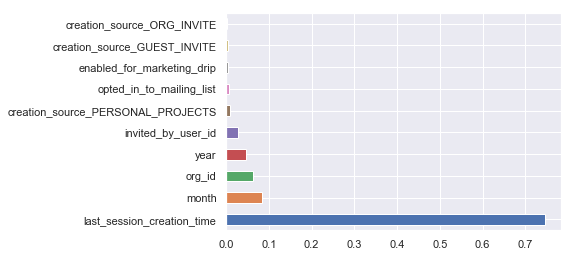

last_session_creation_time            0.745704
month                                 0.085082
org_id                                0.062059
year                                  0.046671
invited_by_user_id                    0.028444
creation_source_PERSONAL_PROJECTS     0.008630
opted_in_to_mailing_list              0.005837
enabled_for_marketing_drip            0.004958
creation_source_GUEST_INVITE          0.003953
creation_source_ORG_INVITE            0.002968
creation_source_SIGNUP_GOOGLE_AUTH    0.002946
creation_source_SIGNUP                0.002748
dtype: float64

In [22]:
feat_importances = pd.Series(rfc.feature_importances_, index = X.columns)
feat_importances.nlargest(10).plot(kind = 'barh')
plt.show()

feat_importances.sort_values(ascending = False)

The above are feaures have predictive power over predicting user adoption.

As noted in the EDA step above, "month" is in fact a somewhat important feature. The "last_session_creation_time" feature is no doubt important since the time of a user's last login is somewhat indicative of adoption (if they have not logged in in a while, it is likely they are no longer active users).

## My Approach

- Checked to make sure there are no missing values and that the data types of columns are of the type I need them to be in
- Create a column "adopted" based on the criteria that the user has to be logged in on 3 separate days in at least a y day period
- Analyze the data, mainly by creating visualizations that show the proportional differences between adopted vs unadopted users
- Did a little feature engineering to provide more insight into the overall behavior of users
- One hot encoded the "creation_source" column as it seemed that the source type has some effect on user adoption
- Created a Random Forest Classification model, split the data into training & test sets, then evaluated the model's performance, which turned out to be pretty good
- Gathered and listed the important features